In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.plotsettings import *
from gptchem.settings import (
    ONE_COL_GOLDEN_RATIO_HEIGHT_INCH,
    ONE_COL_WIDTH_INCH,
    TWO_COL_GOLDEN_RATIO_HEIGHT_INCH,
)

%matplotlib inline

In [3]:
molclr = pd.read_csv("../molclr_classifcation_res.csv")
molclr["accuracy"] = molclr["acc"]
molclr_grouped = (
    molclr[molclr["name"] == "opv"].groupby(["classes", "num_size"]).agg(["mean", "std", sem])
)

## Load results


In [4]:
all_out = glob("out/**/*.pkl")

In [5]:
all_out = [load_pickle(p) for p in all_out]

In [6]:
extracted_res = []
xgboost_results = []
tabpfn_results = []
rf_results = []
gpr_results = []

for out in all_out:
    try:
        res = {
            "train_size": out["num_train_points"],
            "frac_valid": out["frac_valid"],
            "accuracy": out["accuracy"],
            "f1_macro": out["f1_macro"],
            "f1_micro": out["f1_micro"],
            "kappa": out["kappa"],
            "num_classes": out["num_classes"],
            "representation": out["representation"],
        }
        extracted_res.append(res)
    except KeyError:
        pass

    xgb_res = {
        "train_size": out["num_train_points"],
        "accuracy": out["xgb"]["accuracy"],
        "f1_macro": out["xgb"]["f1_macro"],
        "f1_micro": out["xgb"]["f1_micro"],
        "kappa": out["xgb"]["kappa"],
        "num_classes": out["num_classes"],
    }

    tabpfn_res = {
        "train_size": out["num_train_points"],
        "accuracy": out["tabpfn"]["accuracy"],
        "f1_macro": out["tabpfn"]["f1_macro"],
        "f1_micro": out["tabpfn"]["f1_micro"],
        "kappa": out["tabpfn"]["kappa"],
        "num_classes": out["num_classes"],
    }

    rf_res = {
        "train_size": out["num_train_points"],
        "accuracy": out["rf"]["accuracy"],
        "f1_macro": out["rf"]["f1_macro"],
        "f1_micro": out["rf"]["f1_micro"],
        "kappa": out["rf"]["kappa"],
        "num_classes": out["num_classes"],
    }

    gpr_res = {
        "train_size": out["num_train_points"],
        "accuracy": out["gpr"]["accuracy"],
        "f1_macro": out["gpr"]["f1_macro"],
        "f1_micro": out["gpr"]["f1_micro"],
        "kappa": out["gpr"]["kappa"],
        "num_classes": out["num_classes"],
    }

    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)
    rf_results.append(rf_res)
    gpr_results.append(gpr_res)

In [7]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)
rf_res = pd.DataFrame(rf_results)
gpr_res = pd.DataFrame(gpr_results)

In [8]:
grouped_res = res.groupby(["num_classes", "representation", "train_size"]).agg(["mean", "std", sem])

In [9]:
grouped_xgboost_res = xgboost_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [10]:
grouped_tabpfn_res = tabpfn_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [11]:
grouped_rf_res = rf_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [12]:
grouped_gpr_res = gpr_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [13]:
grouped_res

frac_valid                      \
                                            mean       std       sem   
num_classes representation train_size                                  
2           InChI          10           1.000000  0.000000  0.000000   
                           50           1.000000  0.000000  0.000000   
                           100          1.000000  0.000000  0.000000   
                           200          1.000000  0.000000  0.000000   
                           500          1.000000  0.000000  0.000000   
            SELFIES        10           1.000000  0.000000  0.000000   
                           50           1.000000  0.000000  0.000000   
                           100          1.000000  0.000000  0.000000   
                           200          1.000000  0.000000  0.000000   
                           500          1.000000  0.000000  0.000000   
            SMILES         10           1.000000  0.000000  0.000000   
                           50           1.000000  0.000000  0.000000   
                           100          1.000000  0.000000  0.000000   
                           200          1.000000  0.000000  0.000000   
                           500          1.000000       NaN       NaN   
5           InChI          50           0.750000  0.500000  0.250000   
                           100          0.750000  0.500000  0.250000   
                           200          0.500000  0.707107  0.500000   
            SELFIES        50           0.666667  0.577350  0.333333   
                           100          0.666667  0.577350  0.333333   
                           200          0.500000  0.707107  0.500000   
            SMILES         50           0.750000  0.500000  0.250000   
                           100          0.750000  0.500000  0.250000   
                           200          0.500000  0.707107  0.500000   
                           500          1.000000       NaN       NaN   

                                       accuracy                      f1_macro  \
                                           mean       std       sem      mean   
num_classes representation train_size                                           
2           InChI          10          0.506000  0.045782  0.022891  0.439874   
                           50          0.523000  0.040972  0.020486  0.514303   
                           100         0.545333  0.036295  0.020955  0.544396   
                           200         0.582667  0.022030  0.012719  0.579857   
                           500         0.632000  0.011314  0.008000  0.630471   
            SELFIES        10          0.532000  0.014967  0.007483  0.515020   
                           50          0.535000  0.060784  0.030392  0.531582   
                           100         0.570000  0.043143  0.021572  0.569493   
                           200         0.568000  0.022271  0.012858  0.566593   
                           500         0.636000  0.016971  0.012000  0.635847   
            SMILES         10          0.495000  0.013216  0.006608  0.478831   
                           50          0.578000  0.037310  0.018655  0.577443   
                           100         0.614000  0.052000  0.026000  0.611323   
                           200         0.596000  0.024221  0.012111  0.594629   
                           500         0.636000       NaN       NaN  0.635528   
5           InChI          50          0.184000  0.122898  0.061449  0.179974   
                           100         0.193000  0.129177  0.064588  0.186873   
                           200         0.132000  0.186676  0.132000  0.128710   
            SELFIES        50          0.145333  0.127143  0.073406  0.136683   
                           100         0.160000  0.141365  0.081617  0.154200   
                           200         0.142000  0.200818  0.142000  0.132358   
            SMILES         50          0.176000  0.118973  0.059487  0.163812

In [14]:
grouped_tabpfn_res

accuracy                      f1_macro            \
                            mean       std       sem      mean       std   
num_classes train_size                                                     
2           10          0.572000  0.015350  0.004431  0.557292  0.022544   
            50          0.576000  0.011817  0.003411  0.574953  0.011567   
            100         0.602909  0.045152  0.013614  0.599684  0.046441   
            200         0.644800  0.027247  0.008616  0.643119  0.027667   
            500         0.642400  0.002191  0.000980  0.641533  0.002433   
5           50          0.226909  0.040203  0.012122  0.220843  0.036414   
            100         0.283273  0.017327  0.005224  0.268243  0.012859   
            200         0.312000  0.000000  0.000000  0.274818  0.000000   
            500         0.292000       NaN       NaN  0.264437       NaN   

                                  f1_micro                         kappa  \
                             sem      mean       std       sem      mean   
num_classes train_size                                                     
2           10          0.006508  0.572000  0.015350  0.004431  0.144000   
            50          0.003339  0.576000  0.011817  0.003411  0.152000   
            100         0.014003  0.602909  0.045152  0.013614  0.205818   
            200         0.008749  0.644800  0.027247  0.008616  0.289600   
            500         0.001088  0.642400  0.002191  0.000980  0.284800   
5           50          0.010979  0.226909  0.040203  0.012122  0.033636   
            100         0.003877  0.283273  0.017327  0.005224  0.104091   
            200         0.000000  0.312000  0.000000  0.000000  0.140000   
            500              NaN  0.292000       NaN       NaN  0.115000   

                                            
                             std       sem  
num_classes train_size                      
2           10          0.030701  0.008863  
            50          0.023634  0.006822  
            100         0.090304  0.027228  
            200         0.054494  0.017233  
            500         0.004382  0.001960  
5           50          0.050254  0.015152  
            100         0.021659  0.006530  
            200         0.000000  0.000000  
            500              NaN       NaN

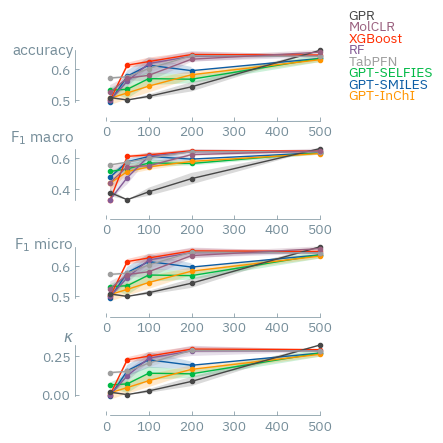

In [15]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[2, "SMILES", :].index,
        grouped_res.loc[2, "SMILES", :][metric]["mean"],
        marker="o",
        label="GPT-SMILES",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "SMILES", :].index,
        grouped_res.loc[2, "SMILES", :][metric]["mean"]
        - grouped_res.loc[2, "SMILES", :][metric]["sem"],
        grouped_res.loc[2, "SMILES", :][metric]["mean"]
        + grouped_res.loc[2, "SMILES", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[2, "SELFIES", :].index,
        grouped_res.loc[2, "SELFIES", :][metric]["mean"],
        marker="o",
        label="GPT-SELFIES",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "SELFIES", :].index,
        grouped_res.loc[2, "SELFIES", :][metric]["mean"]
        - grouped_res.loc[2, "SELFIES", :][metric]["sem"],
        grouped_res.loc[2, "SELFIES", :][metric]["mean"]
        + grouped_res.loc[2, "SELFIES", :][metric]["sem"],
        alpha=0.2,
    )

    if metric != "kappa":
        range_frame(
            ax[i],
            molclr_grouped.loc[2, :].index,
            np.vstack(
                [
                    grouped_res.loc[2, "SMILES", :][metric]["mean"].values.reshape(-1, 1),
                    grouped_res.loc[2, "SELFIES", :][metric]["mean"].values.reshape(-1, 1),
                    grouped_res.loc[2, "InChI", :][metric]["mean"].values.reshape(-1, 1),
                    grouped_xgboost_res.loc[2, :][metric]["mean"].values.reshape(-1, 1),
                    grouped_rf_res.loc[2, :][metric]["mean"].values.reshape(-1, 1),
                    grouped_tabpfn_res.loc[2, :][metric]["mean"].values.reshape(-1, 1),
                    molclr_grouped.loc[2, :][metric]["mean"].values.reshape(-1, 1),
                    grouped_gpr_res.loc[2, :][metric]["mean"].values.reshape(-1, 1),
                ]
            ).flatten(),
        )
    else:
        range_frame(
            ax[i],
            molclr_grouped.loc[2, :].index,
            np.stack(
                [
                    grouped_res.loc[2, "SMILES", :][metric]["mean"],
                    grouped_res.loc[2, "SELFIES", :][metric]["mean"],
                    grouped_res.loc[2, "InChI", :][metric]["mean"],
                    grouped_xgboost_res.loc[2, :][metric]["mean"],
                    grouped_rf_res.loc[2, :][metric]["mean"],
                    grouped_tabpfn_res.loc[2, :][metric]["mean"],
                    grouped_gpr_res.loc[2, :][metric]["mean"],
                ]
            ).flatten(),
        )

    ax[i].plot(
        grouped_res.loc[2, "InChI", :].index,
        grouped_res.loc[2, "InChI", :][metric]["mean"],
        marker="o",
        label="GPT-InChI",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "InChI", :].index,
        grouped_res.loc[2, "InChI", :][metric]["mean"]
        - grouped_res.loc[2, "InChI", :][metric]["sem"],
        grouped_res.loc[2, "InChI", :][metric]["mean"]
        + grouped_res.loc[2, "InChI", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :][metric]["mean"],
        marker="o",
        label="XGBoost",
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :][metric]["mean"]
        - grouped_xgboost_res.loc[2, :][metric]["sem"],
        grouped_xgboost_res.loc[2, :][metric]["mean"]
        + grouped_xgboost_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rf_res.loc[2, :].index,
        grouped_rf_res.loc[2, :][metric]["mean"],
        marker="o",
        label="RF",
    )
    ax[i].fill_between(
        grouped_rf_res.loc[2, :].index,
        grouped_rf_res.loc[2, :][metric]["mean"] - grouped_rf_res.loc[2, :][metric]["sem"],
        grouped_rf_res.loc[2, :][metric]["mean"] + grouped_rf_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_gpr_res.loc[2, :].index,
        grouped_gpr_res.loc[2, :][metric]["mean"],
        marker="o",
        label="GPR",
    )
    ax[i].fill_between(
        grouped_gpr_res.loc[2, :].index,
        grouped_gpr_res.loc[2, :][metric]["mean"] - grouped_gpr_res.loc[2, :][metric]["sem"],
        grouped_gpr_res.loc[2, :][metric]["mean"] + grouped_gpr_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :][metric]["mean"],
        marker="o",
        label="TabPFN",
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :][metric]["mean"] - grouped_tabpfn_res.loc[2, :][metric]["sem"],
        grouped_tabpfn_res.loc[2, :][metric]["mean"] + grouped_tabpfn_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    if metric != "kappa":
        ax[i].plot(
            molclr_grouped.loc[2, :].index,
            molclr_grouped.loc[2, :][metric]["mean"],
            label="MolCLR",
            marker="o",
        )
        ax[i].fill_between(
            molclr_grouped.loc[2, :].index,
            molclr_grouped.loc[2, :][metric]["mean"] - molclr_grouped.loc[2, :][metric]["sem"],
            molclr_grouped.loc[2, :][metric]["mean"] + molclr_grouped.loc[2, :][metric]["sem"],
            alpha=0.2,
        )

matplotx.line_labels(ax[0])
ylabel_top("accuracy", ax=ax[0], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ micro", ax=ax[2], y_pad=0.1, x_pad=0.04)
ylabel_top(r"$\kappa$", ax=ax[3], y_pad=0.1, x_pad=0.04)
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)

fig.savefig("opv-classification_results_2_class.pdf", bbox_inches="tight")

In [16]:
find_learning_curve_intersection(
    grouped_res.loc[2, "SELFIES", :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

2.258870134348986

In [17]:
find_learning_curve_intersection(
    grouped_res.loc[2, "SELFIES", :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

0.7675567287146652

In [18]:
find_learning_curve_intersection(
    grouped_res.loc[2, "SELFIES", :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        molclr_grouped.loc[2, :].index,
        molclr_grouped.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

1.4769153992100033

In [19]:
intersections = []

for i, val in enumerate(grouped_res.loc[2, "SELFIES", :].index):
    factor = (
        find_learning_curve_intersection(
            grouped_res.loc[2, "SELFIES", :]["f1_macro"]["mean"].values[i],
            fit_learning_curve(
                grouped_xgboost_res.loc[2, :].index,
                grouped_xgboost_res.loc[2, :]["f1_macro"]["mean"],
            )[0],
        )
        / val
    )

    intersections.append(factor)


intersections_tabpfn = []

for i, val in enumerate(grouped_res.loc[2, "SELFIES", :].index):
    factor = (
        find_learning_curve_intersection(
            grouped_res.loc[2, "SELFIES", :]["f1_macro"]["mean"].values[i],
            fit_learning_curve(
                grouped_tabpfn_res.loc[2, :].index,
                grouped_tabpfn_res.loc[2, :]["f1_macro"]["mean"],
            )[0],
        )
        / val
    )

    intersections_tabpfn.append(factor)

In [20]:
from gptchem.evaluator import add_kappa_vlines, get_kappa_intersections

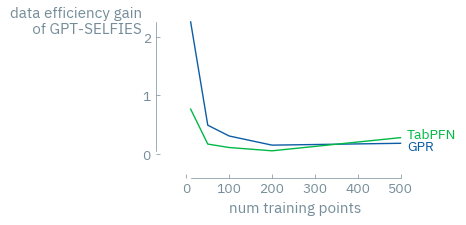

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))
plt.plot(grouped_res.loc[2, "SELFIES", :].index, intersections, label="GPR")
plt.plot(grouped_res.loc[2, "SELFIES", :].index, intersections_tabpfn, label="TabPFN")
matplotx.line_labels()
add_kappa_vlines(
    grouped_res.loc[2, "SELFIES", :]["kappa"].index,
    grouped_res.loc[2, "SELFIES", :]["kappa"]["mean"],
    low=-20,
    ymax=5,
)

ylabel_top("data efficiency gain\n  of GPT-SELFIES", y_pad=-0.16, x_pad=0.09)
range_frame(
    ax,
    grouped_res.loc[2, "SELFIES", :]["kappa"].index,
    np.stack([intersections, intersections_tabpfn]).flatten(),
)
plt.xlabel("num training points", labelpad=4)
plt.savefig("opv-binary-data-efficiency.pdf", bbox_inches="tight")

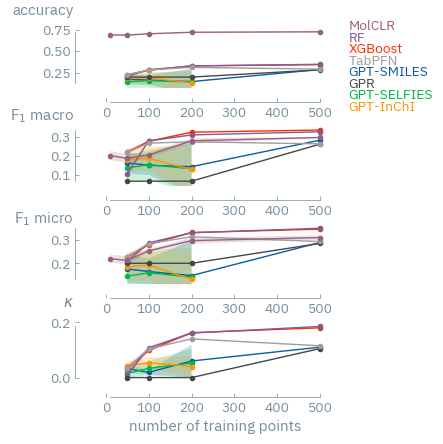

In [22]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[5, "SMILES", :].index,
        grouped_res.loc[5, "SMILES", :][metric]["mean"],
        marker="o",
        label="GPT-SMILES",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "SMILES", :].index,
        grouped_res.loc[5, "SMILES", :][metric]["mean"]
        - grouped_res.loc[5, "SMILES", :][metric]["sem"],
        grouped_res.loc[5, "SMILES", :][metric]["mean"]
        + grouped_res.loc[5, "SMILES", :][metric]["sem"],
        alpha=0.2,
    )

    if metric != "kappa":
        range_frame(
            ax[i],
            molclr_grouped.loc[5, :].index,
            np.vstack(
                [
                    grouped_res.loc[5, "SMILES", :][metric]["mean"].values.reshape(-1, 1),
                    grouped_res.loc[5, "SELFIES", :][metric]["mean"].values.reshape(-1, 1),
                    grouped_res.loc[5, "InChI", :][metric]["mean"].values.reshape(-1, 1),
                    grouped_xgboost_res.loc[5, :][metric]["mean"].values.reshape(-1, 1),
                    grouped_rf_res.loc[5, :][metric]["mean"].values.reshape(-1, 1),
                    grouped_tabpfn_res.loc[5, :][metric]["mean"].values.reshape(-1, 1),
                    molclr_grouped.loc[5, :][metric]["mean"].values.reshape(-1, 1),
                    grouped_gpr_res.loc[5, :][metric]["mean"].values.reshape(-1, 1),
                ]
            ).flatten(),
        )
    else:
        range_frame(
            ax[i],
            molclr_grouped.loc[5, :].index,
            np.vstack(
                [
                    grouped_res.loc[5, "SMILES", :][metric]["mean"].values.reshape(-1, 1),
                    grouped_res.loc[5, "SELFIES", :][metric]["mean"].values.reshape(-1, 1),
                    grouped_res.loc[5, "InChI", :][metric]["mean"].values.reshape(-1, 1),
                    grouped_xgboost_res.loc[5, :][metric]["mean"].values.reshape(-1, 1),
                    grouped_rf_res.loc[5, :][metric]["mean"].values.reshape(-1, 1),
                    grouped_tabpfn_res.loc[5, :][metric]["mean"].values.reshape(-1, 1),
                    grouped_gpr_res.loc[5, :][metric]["mean"].values.reshape(-1, 1),
                ]
            ).flatten(),
        )

    ax[i].plot(
        grouped_res.loc[5, "SELFIES", :].index,
        grouped_res.loc[5, "SELFIES", :][metric]["mean"],
        marker="o",
        label="GPT-SELFIES",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "SELFIES", :].index,
        grouped_res.loc[5, "SELFIES", :][metric]["mean"]
        - grouped_res.loc[5, "SELFIES", :][metric]["sem"],
        grouped_res.loc[5, "SELFIES", :][metric]["mean"]
        + grouped_res.loc[5, "SELFIES", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[5, "InChI", :].index,
        grouped_res.loc[5, "InChI", :][metric]["mean"],
        marker="o",
        label="GPT-InChI",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "InChI", :].index,
        grouped_res.loc[5, "InChI", :][metric]["mean"]
        - grouped_res.loc[5, "InChI", :][metric]["sem"],
        grouped_res.loc[5, "InChI", :][metric]["mean"]
        + grouped_res.loc[5, "InChI", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[5, :].index,
        grouped_xgboost_res.loc[5, :][metric]["mean"],
        marker="o",
        label="XGBoost",
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[5, :].index,
        grouped_xgboost_res.loc[5, :][metric]["mean"]
        - grouped_xgboost_res.loc[5, :][metric]["sem"],
        grouped_xgboost_res.loc[5, :][metric]["mean"]
        + grouped_xgboost_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rf_res.loc[5, :].index,
        grouped_rf_res.loc[5, :][metric]["mean"],
        marker="o",
        label="RF",
    )
    ax[i].fill_between(
        grouped_rf_res.loc[5, :].index,
        grouped_rf_res.loc[5, :][metric]["mean"] - grouped_rf_res.loc[5, :][metric]["sem"],
        grouped_rf_res.loc[5, :][metric]["mean"] + grouped_rf_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_gpr_res.loc[5, :].index,
        grouped_gpr_res.loc[5, :][metric]["mean"],
        marker="o",
        label="GPR",
    )
    ax[i].fill_between(
        grouped_gpr_res.loc[5, :].index,
        grouped_gpr_res.loc[5, :][metric]["mean"] - grouped_gpr_res.loc[5, :][metric]["sem"],
        grouped_gpr_res.loc[5, :][metric]["mean"] + grouped_gpr_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[5, :].index,
        grouped_tabpfn_res.loc[5, :][metric]["mean"],
        marker="o",
        label="TabPFN",
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[5, :].index,
        grouped_tabpfn_res.loc[5, :][metric]["mean"] - grouped_tabpfn_res.loc[5, :][metric]["sem"],
        grouped_tabpfn_res.loc[5, :][metric]["mean"] + grouped_tabpfn_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    if metric != "kappa":
        ax[i].plot(
            molclr_grouped.loc[5, :].index,
            molclr_grouped.loc[5, :][metric]["mean"],
            label="MolCLR",
            marker="o",
        )
        ax[i].fill_between(
            molclr_grouped.loc[5, :].index,
            molclr_grouped.loc[5, :][metric]["mean"] - molclr_grouped.loc[5, :][metric]["sem"],
            molclr_grouped.loc[5, :][metric]["mean"] + molclr_grouped.loc[5, :][metric]["sem"],
            alpha=0.2,
        )

matplotx.line_labels(ax[0])
ylabel_top("accuracy", ax=ax[0], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ micro", ax=ax[2], y_pad=0.1, x_pad=0.04)
ylabel_top(r"$\kappa$", ax=ax[3], y_pad=0.1, x_pad=0.04)
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)
ax[-1].set_xlabel("number of training points", labelpad=4)
fig.savefig("opv-classification_results_5_class.pdf", bbox_inches="tight")